# Importing Datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing

In [ ]:
df = pd.read_csv('/content/kindey stone urine analysis.csv')
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [ ]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [ ]:
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [ ]:
df[df.duplicated()]

,gravity,ph,osmo,cond,urea,calc,target


<Axes: >

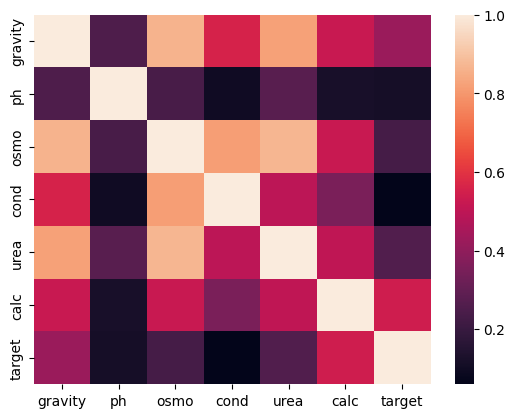

In [ ]:
sns.heatmap(df.corr().abs())

In [ ]:
output = []
for col in df.columns:
    unique = df[col].nunique()
    colType = str(df[col].dtype)
    categories=df[col].unique()

    output.append([col, unique, colType,categories])

output = pd.DataFrame(output)
output.columns = ['colName','unique','dtype','categories']
output

,colName,unique,dtype,categories
0,gravity,29,float64,"[1.021, 1.017, 1.008, 1.011, 1.005, 1.02, 1.01..."
1,ph,70,float64,"[4.91, 5.74, 7.2, 5.51, 6.52, 5.27, 5.62, 5.67..."
2,osmo,77,int64,"[725, 577, 321, 408, 187, 668, 461, 1107, 543,..."
3,cond,64,float64,"[14.0, 20.0, 14.9, 12.6, 7.5, 25.3, 17.4, 35.9..."
4,urea,73,int64,"[443, 296, 101, 224, 91, 252, 195, 550, 170, 3..."
5,calc,75,float64,"[2.45, 4.49, 2.36, 2.15, 1.16, 3.34, 1.4, 8.48..."
6,target,2,int64,"[0, 1]"


# Data Visualization

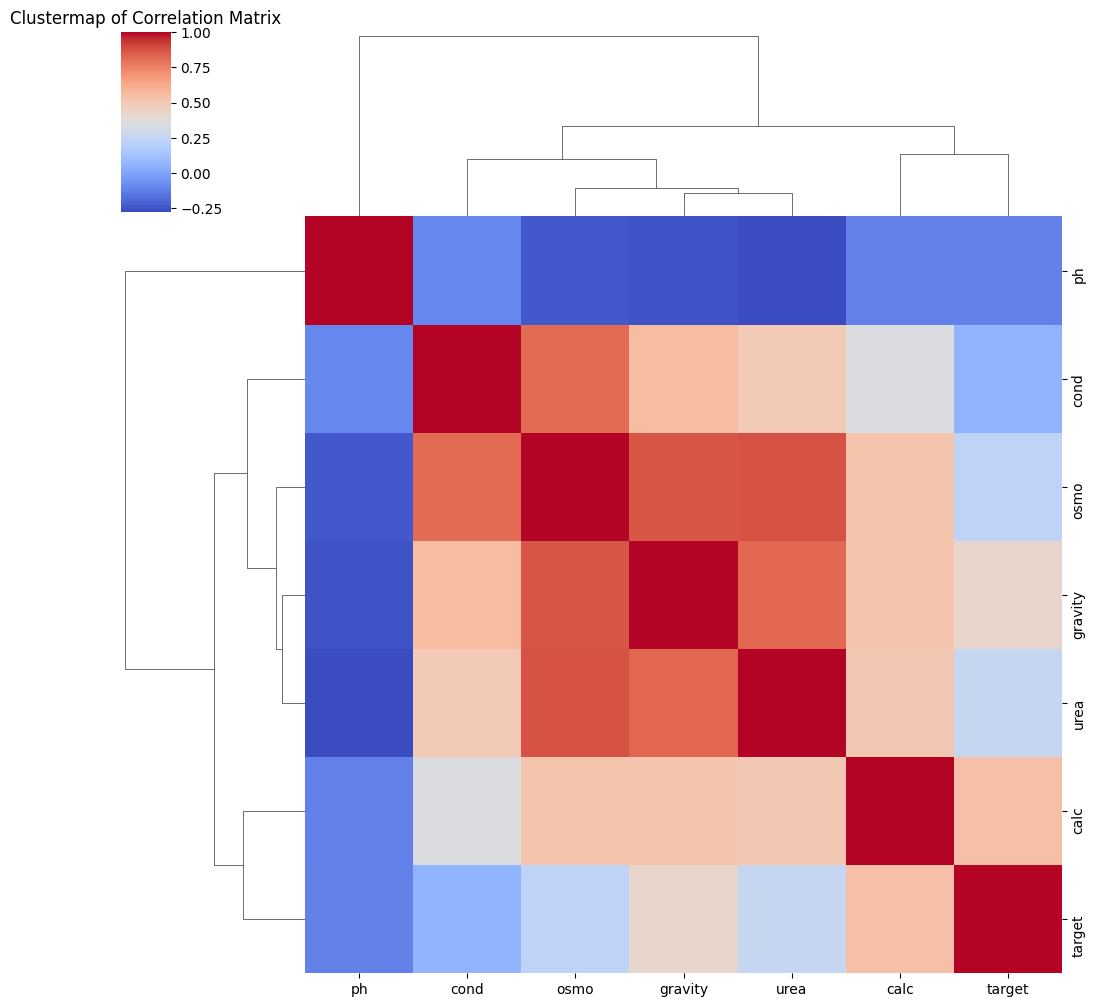

In [ ]:
sns.clustermap(df.corr(), cmap='coolwarm')
sns.set_palette("viridis")
plt.title('Clustermap of Correlation Matrix')
plt.show()

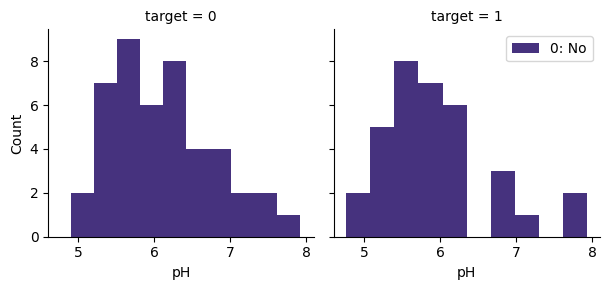

In [ ]:
g = sns.FacetGrid(df, col='target',palette='RdYlBu')
sns.set_palette("viridis")
g.map(plt.hist, 'ph')
g.set_xlabels('pH')
g.set_ylabels('Count')
plt.legend(labels=['0: No', '1: Yes'])
plt.show()

The graph shows urine pH levels for kidney stone patients (target 1) vs healthy individuals (0: No). There are more healthy cases, potentially biasing the model towards predicting no stones. Ideal data would have a balanced distribution across the pH range for both groups, allowing for more accurate stone prediction across various urine acidities.

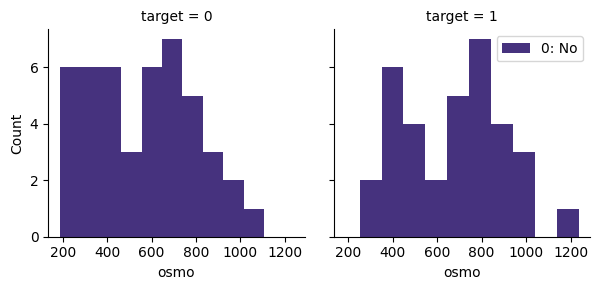

In [ ]:
g = sns.FacetGrid(df, col='target',palette='RdYlBu')
sns.set_palette("viridis")
g.map(plt.hist, 'osmo')
g.set_xlabels('osmo')
g.set_ylabels('Count')
plt.legend(labels=['0: No', '1: Yes'])
plt.show()

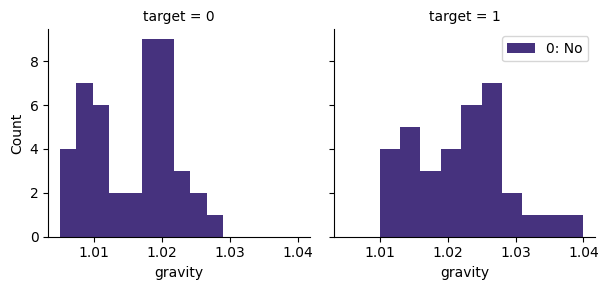

In [ ]:
g = sns.FacetGrid(df, col='target',palette='RdYlBu')
sns.set_palette("viridis")
g.map(plt.hist, 'gravity')
g.set_xlabels('gravity')
g.set_ylabels('Count')
plt.legend(labels=['0: No', '1: Yes'])
plt.show()


<ipython-input-119-5792b9274b66>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['gravity'], shade=True, palette='Set1')
<ipython-input-119-5792b9274b66>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['gravity'], shade=True, palette='Set1')


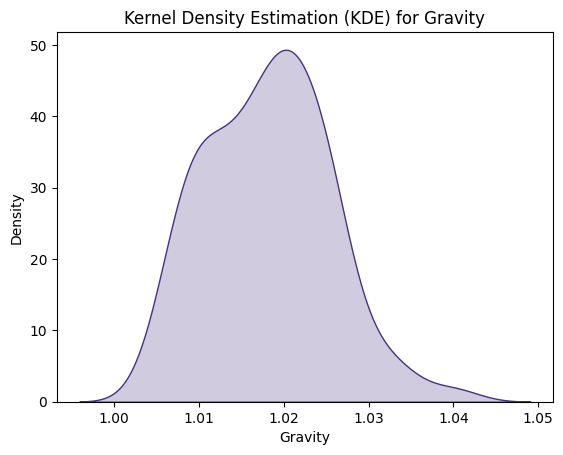

In [ ]:
sns.kdeplot(df['gravity'], shade=True, palette='Set1')
sns.set_palette("viridis")
plt.xlabel('Gravity')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) for Gravity')
plt.show()

<ipython-input-120-3d0825bf14d7>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ph'], shade=True, palette='Set1')
<ipython-input-120-3d0825bf14d7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['ph'], shade=True, palette='Set1')


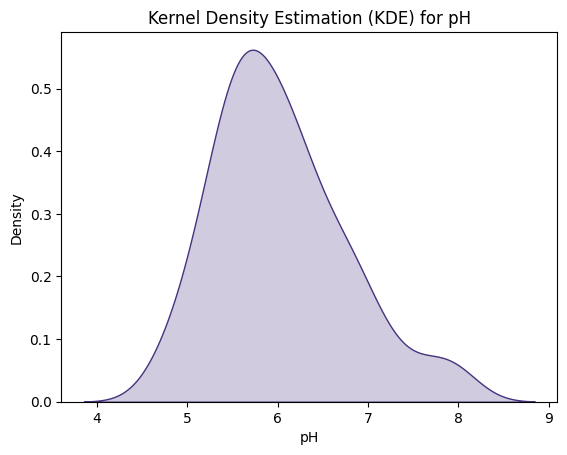

In [ ]:
sns.kdeplot(df['ph'], shade=True, palette='Set1')
sns.set_palette("viridis")
plt.xlabel('pH')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) for pH')
plt.show()

<ipython-input-121-41dff1583909>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['osmo'], shade=True, palette='Set1')
<ipython-input-121-41dff1583909>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['osmo'], shade=True, palette='Set1')


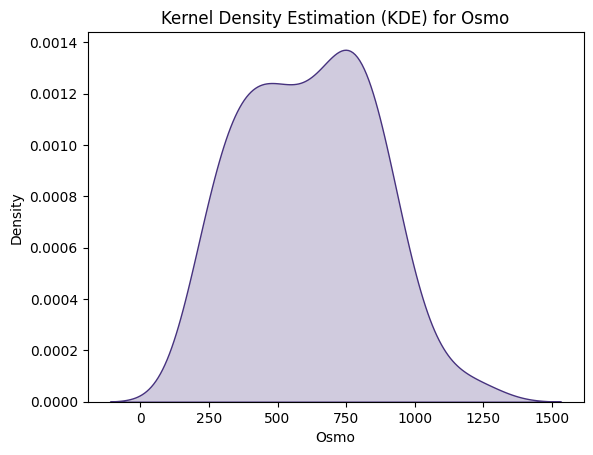

In [ ]:
sns.kdeplot(df['osmo'], shade=True, palette='Set1')
sns.set_palette("viridis")
plt.xlabel('Osmo')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) for Osmo')
plt.show()

<ipython-input-122-cbce2675ddee>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cond'], shade=True, palette='Set1')
<ipython-input-122-cbce2675ddee>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['cond'], shade=True, palette='Set1')


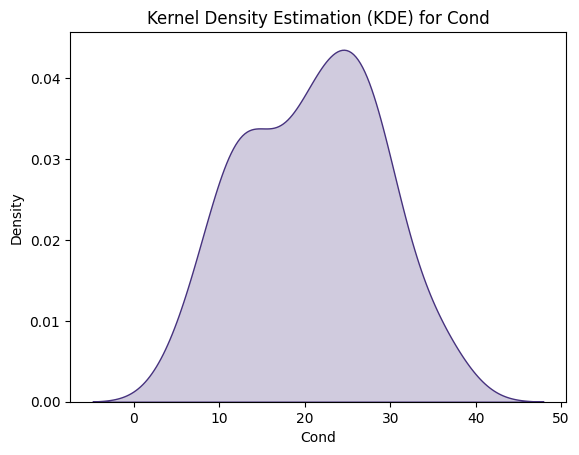

In [ ]:
sns.kdeplot(df['cond'], shade=True, palette='Set1')
sns.set_palette("viridis")
plt.xlabel('Cond')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) for Cond')
plt.show()

<ipython-input-123-1c0c4d58bbe2>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['urea'], shade=True, palette='Set1')
<ipython-input-123-1c0c4d58bbe2>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['urea'], shade=True, palette='Set1')


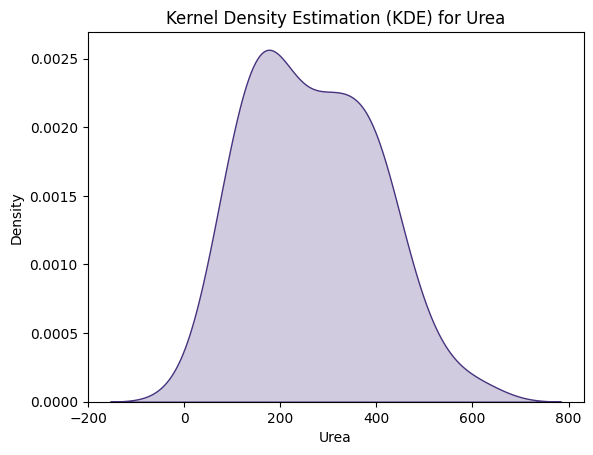

In [ ]:
sns.kdeplot(df['urea'], shade=True, palette='Set1')
sns.set_palette("viridis")
plt.xlabel('Urea')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) for Urea')
plt.show()

<ipython-input-124-71cdfeaae6bf>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['calc'], shade=True, palette='Set1')
<ipython-input-124-71cdfeaae6bf>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['calc'], shade=True, palette='Set1')


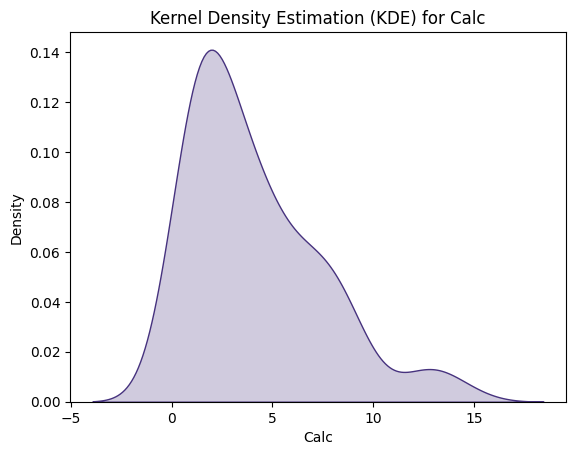

In [ ]:
sns.kdeplot(df['calc'], shade=True, palette='Set1')
sns.set_palette("viridis")
plt.xlabel('Calc')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) for Calc')
plt.show()

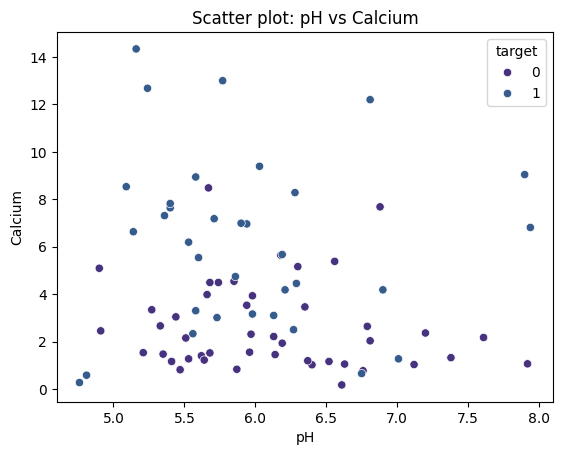

In [ ]:
sns.scatterplot(x='ph', y='calc', data=df, hue='target')
sns.set_palette("viridis")
plt.xlabel('pH')
plt.ylabel('Calcium')
plt.title('Scatter plot: pH vs Calcium')
plt.show()

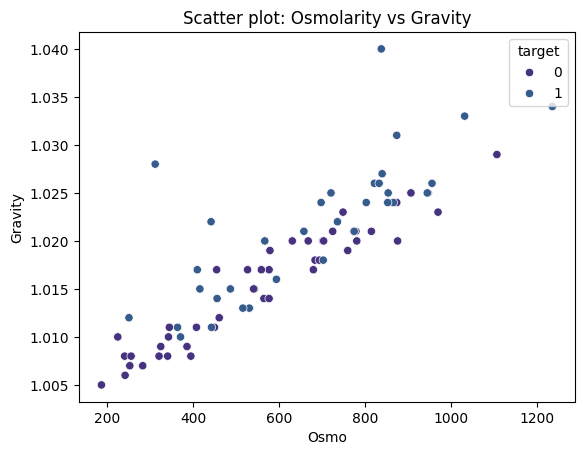

In [ ]:
sns.scatterplot(x='osmo', y='gravity', data=df, hue='target')
sns.set_palette("viridis")
plt.xlabel('Osmo')
plt.ylabel('Gravity')
plt.title('Scatter plot: Osmolarity vs Gravity')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


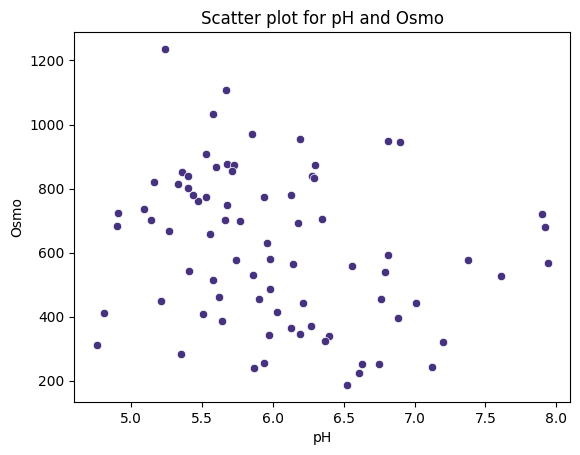

In [ ]:
sns.scatterplot(x='ph', y='osmo', data=df, cmap='coolwarm')
sns.set_palette("viridis")
plt.xlabel('pH')
plt.ylabel('Osmo')
plt.title('Scatter plot for pH and Osmo')
plt.show()

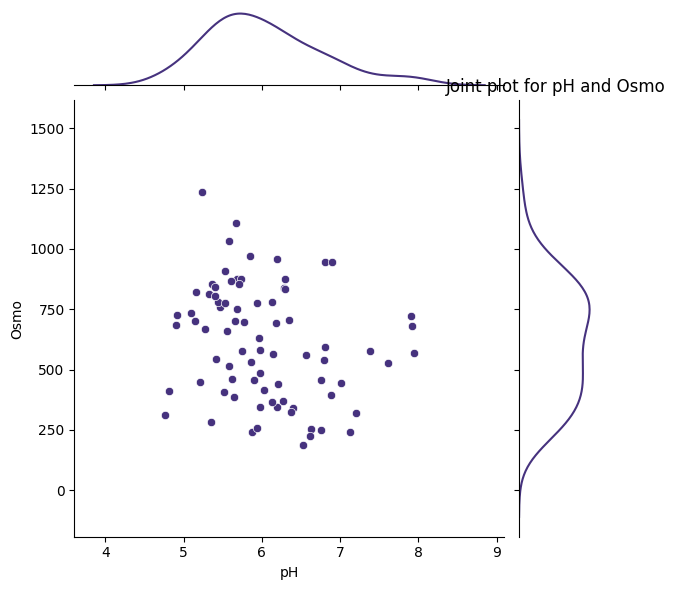

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.JointGrid(data=df, x='ph', y='osmo')
sns.set_palette("viridis")

g.plot(sns.scatterplot, sns.kdeplot)

g.set_axis_labels(xlabel='pH', ylabel='Osmo')
plt.title('Joint plot for pH and Osmo')

plt.show()

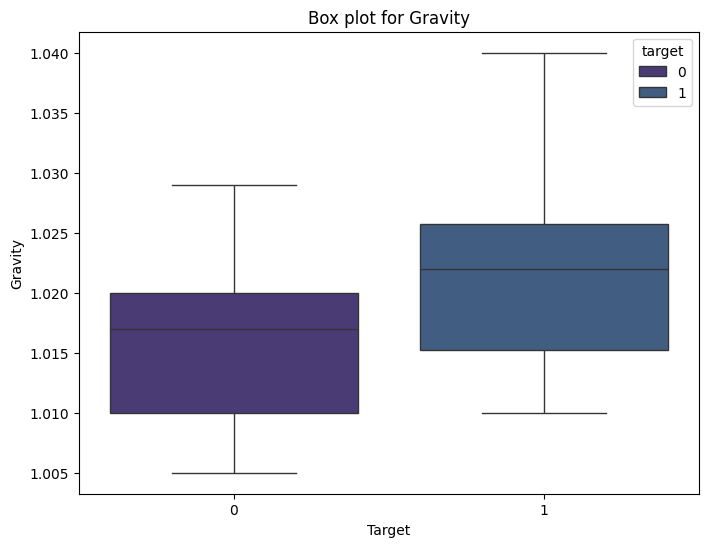

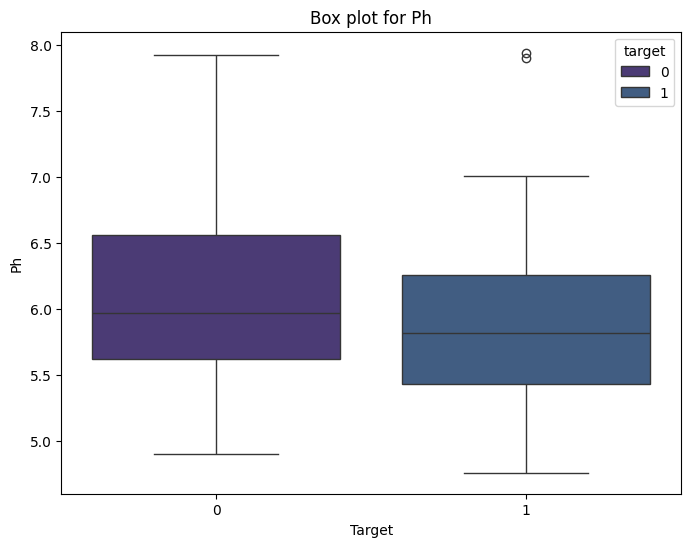

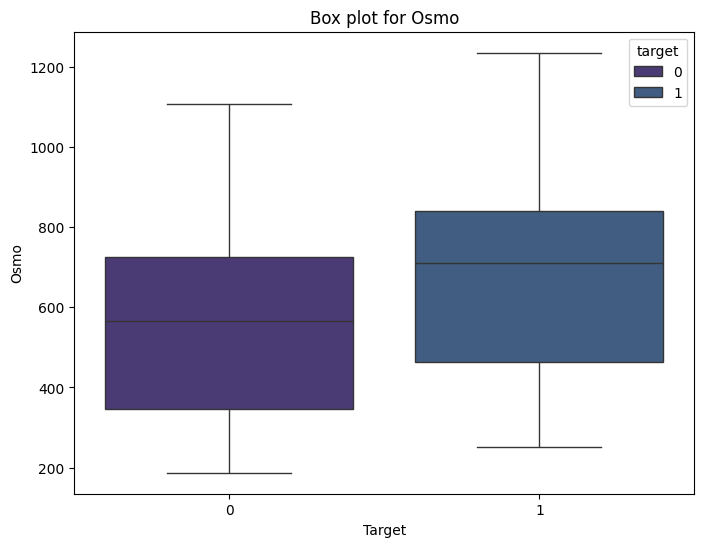

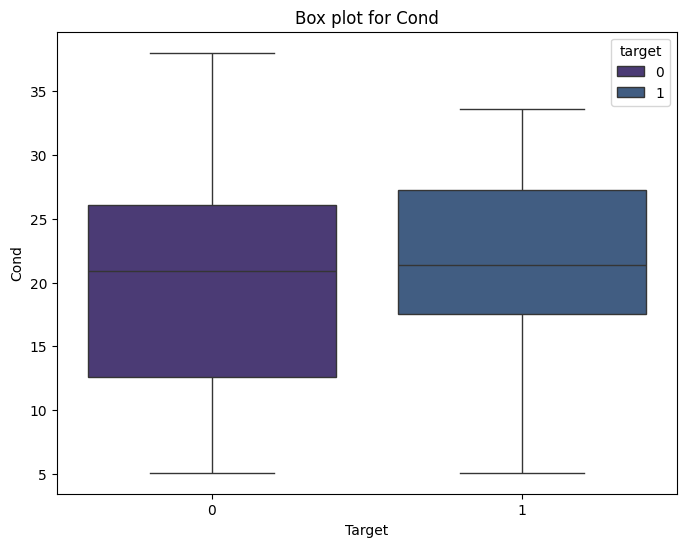

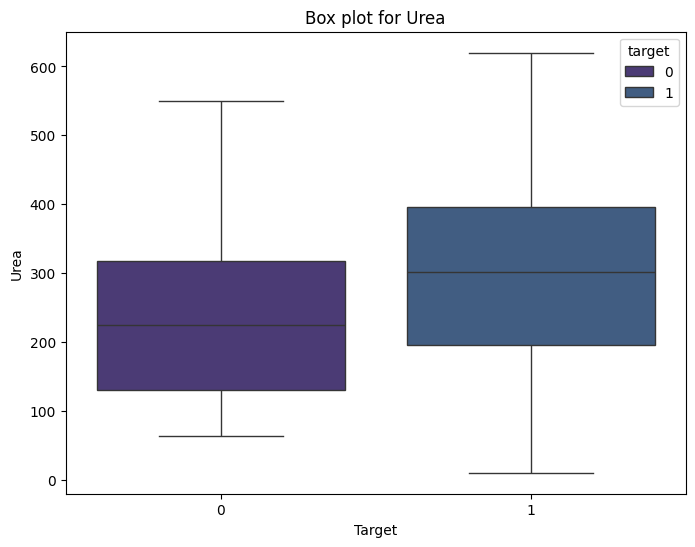

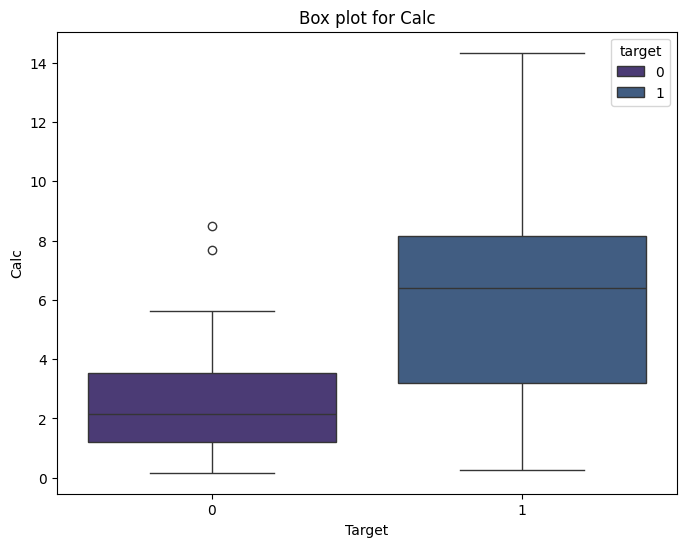

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.set_palette("viridis")
    sns.boxplot(x='target', y=column, data=df,hue='target')
    plt.xlabel('Target')
    plt.ylabel(column.capitalize())
    plt.title(f'Box plot for {column.capitalize()}')
    plt.show()

**Data Distribution:** The histograms along the diagonal of the plot reveal the distribution of each feature independent of the target variable.
target: The distribution appears somewhat normal, with a slight positive skew.

**cond (conductivity):** The distribution is left-skewed, with more data points concentrated on the lower end.

**osmo (osmolality):** The distribution leans towards the right, suggesting a positive skew.

**grav (gravity):** The data seems mostly concentrated in the center, with a possible slight left skew.

**ph:** The distribution is difficult to determine visually due to the limited data points

**Target vs. Conductivity:** There appears to be a clear separation between the distributions of conductivity values for the two target classes. The target class with a value of 0 has a lower median conductivity value and a narrower range compared to the target class with a value of 1. This suggests that conductivity may be a useful feature for discriminating between the two target classes.

**Target vs. Gravity:** Similar to conductivity, there seems to be a separation between the distributions of gravity values for the two target classes. The target class with a value of 0 has a lower median gravity value and a wider range compared to the target class with a value of 1. Gravity may also be a useful feature for classification.

**Target vs. pH:** The distribution of pH values for the two target classes appears to overlap more than conductivity and gravity. The median pH value for the target class of 1 might be slightly higher than the median for the target class of 0, but it's difficult to say for sure due to the limited data points and the overlap in distributions.

**Target vs. Osmolality:** The distributions of osmolality values for the two target classes seem to overlap considerably. There is no clear separation between the medians, and the ranges of the distributions also overlap. Osmolality may not be a very useful feature for classification based on this plot.

The box in a box plot represents the interquartile range (IQR) of the data. The IQR is the range that contains the middle 50% of the data points.
The line in the middle of the box represents the median of the data.

The whiskers of the box plot extend to the most extreme data points that are not considered outliers. Outliers are plotted as individual points beyond the whiskers.

By comparing the box plots for different features, you can see how the distribution of the feature values varies between the two classes of the target variable.

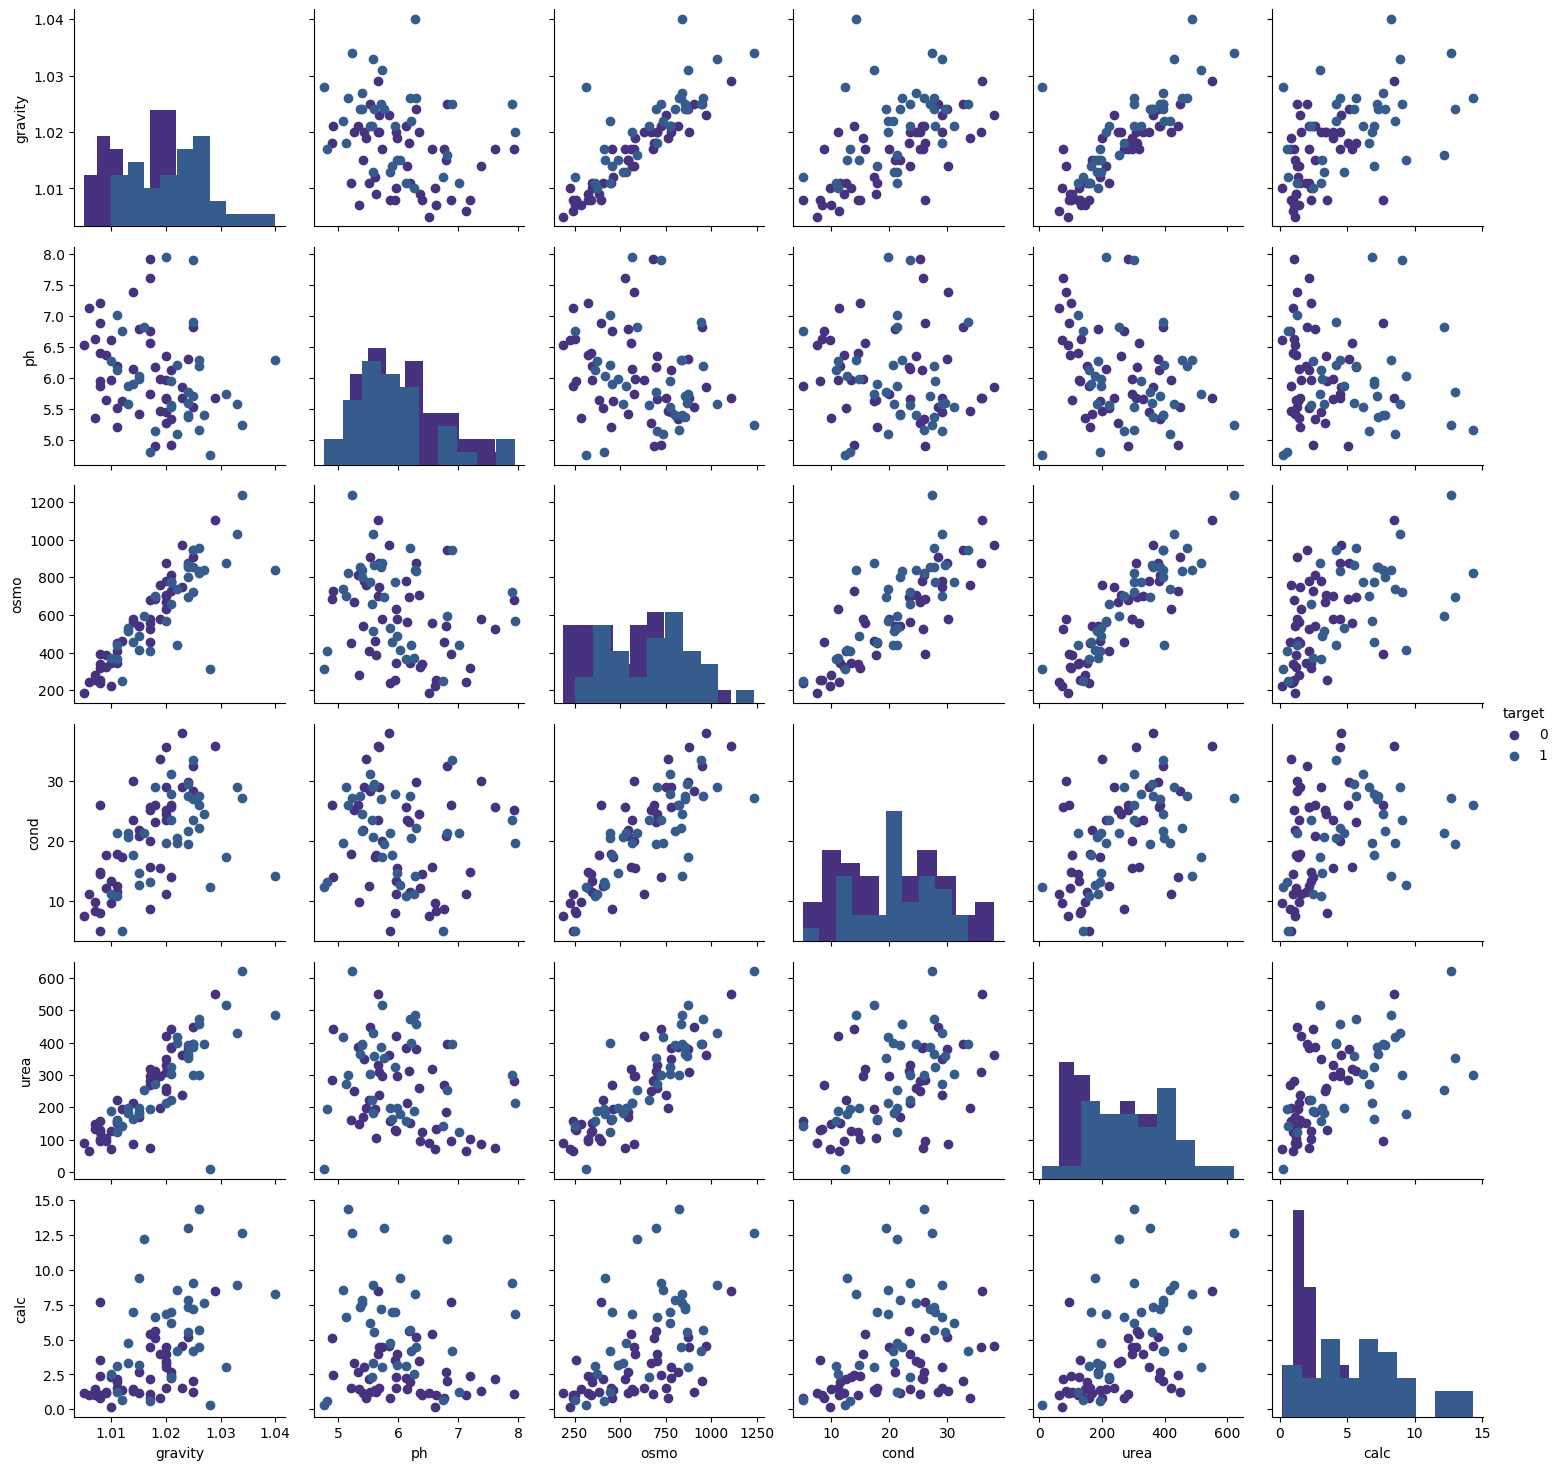

In [ ]:
g = sns.PairGrid(df, hue='target')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

**Target vs. pH:** There's a positive correlation, meaning as the pH value increases, the target variable likely increases as well.

**Target vs. Conductivity:** Similar to pH, a positive correlation exists between target and conductivity. Higher conductivity values are likely associated with higher target values.

**Target vs. Osmolality:** The plot suggests a negative correlation. As osmolality increases, the target variable appears to decrease.

**Target vs. Gravity:** Another positive correlation is evident. Higher gravity values tend to correspond with higher target values.

**Individual Variable Distribution:** The diagonal histograms provide information about the distribution of each variable independently. They can reveal skewness, outliers, or any unexpected patterns within a single variable.

# Model Building and Evaluation

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
print(X)

[[1.021e+00 4.910e+00 7.250e+02 1.400e+01 4.430e+02 2.450e+00]
 [1.017e+00 5.740e+00 5.770e+02 2.000e+01 2.960e+02 4.490e+00]
 [1.008e+00 7.200e+00 3.210e+02 1.490e+01 1.010e+02 2.360e+00]
 [1.011e+00 5.510e+00 4.080e+02 1.260e+01 2.240e+02 2.150e+00]
 [1.005e+00 6.520e+00 1.870e+02 7.500e+00 9.100e+01 1.160e+00]
 [1.020e+00 5.270e+00 6.680e+02 2.530e+01 2.520e+02 3.340e+00]
 [1.012e+00 5.620e+00 4.610e+02 1.740e+01 1.950e+02 1.400e+00]
 [1.029e+00 5.670e+00 1.107e+03 3.590e+01 5.500e+02 8.480e+00]
 [1.015e+00 5.410e+00 5.430e+02 2.190e+01 1.700e+02 1.160e+00]
 [1.021e+00 6.130e+00 7.790e+02 2.570e+01 3.820e+02 2.210e+00]
 [1.011e+00 6.190e+00 3.450e+02 1.150e+01 1.520e+02 1.930e+00]
 [1.025e+00 5.530e+00 9.070e+02 2.840e+01 4.480e+02 1.270e+00]
 [1.006e+00 7.120e+00 2.420e+02 1.130e+01 6.400e+01 1.030e+00]
 [1.007e+00 5.350e+00 2.830e+02 9.900e+00 1.470e+02 1.470e+00]
 [1.011e+00 5.210e+00 4.500e+02 1.790e+01 1.610e+02 1.530e+00]
 [1.018e+00 4.900e+00 6.840e+02 2.610e+01 2.840e+02 5.0

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

**Scaling Values:**
Scaling values in machine learning models ensures faster convergence, equal weighting of features, and improved performance by addressing issues like domination of features with larger scales and algorithm sensitivity to feature scales.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 4.55160490e-01 -1.31307624e+00  4.23409016e-01 -2.45265255e-01
   1.08658922e+00  1.22217666e+00]
 [ 1.02298447e+00  3.26494631e-01  1.39872046e+00  8.28917866e-01
   1.52165181e+00  3.70886298e-01]
 [-1.10635545e+00  2.37063493e-01 -1.22575397e+00 -1.47093574e+00
  -9.62160066e-01 -3.94084409e-01]
 [ 3.13204496e-01 -9.55351683e-01  7.73634490e-01  6.08572611e-01
   8.25551668e-01 -5.25052157e-01]
 [ 3.13204496e-01  2.37063493e-01  6.14038072e-01  5.67257875e-01
   8.01820981e-01 -6.58996444e-01]
 [-5.38531471e-01  1.34856478e-02 -6.80466211e-01 -9.33844178e-01
  -6.53661138e-01 -3.76225171e-01]
 [ 1.71248501e-01 -1.04478282e+00  1.21949115e-01  5.12171561e-01
  -2.26508777e-01 -3.22647456e-01]
 [ 7.39072479e-01 -5.52911561e-01  9.99729416e-01  1.09057786e+00
   6.27795945e-01  3.32191282e-01]
 [ 5.97116485e-01 -1.80281818e-01  1.46078574e+00  2.26116203e+00
   6.43616403e-01  3.45373100e-02]
 [ 2.15863242e+00 -1.08949839e+00  2.64002594e+00  7.87603131e-01
   2.68445546e+00  2.4574

In [ ]:
print(X_test)

[[-0.25461948  2.90509245  0.17514792  0.51217156  0.01079809 -1.00129851]
 [ 0.3132045  -1.58136965  0.37464344 -1.04401681  1.28434494 -0.58755949]
 [-0.68048747  2.10021221 -0.28147516  1.17320733 -1.53169655 -0.92390848]
 [ 0.02929251  0.01348565 -0.2726087  -0.83744313  0.12945152 -0.14703161]
 [-1.53222343  1.35495272 -1.08832372  0.62234419 -1.46841472  0.96917078]
 [-1.53222343 -0.15047144 -1.77104174 -2.26968729 -0.96216007 -1.06975892]
 [-1.10635545  0.32649463 -1.30998542 -1.38830627 -1.01753167 -0.74233956]
 [ 1.30689646 -1.8049475  -1.45628213 -1.26436206 -2.14078417 -1.23644515]
 [-1.95809142  0.81836589 -2.01043636 -1.93916941 -1.50005563 -0.97153311]
 [-1.81613542  1.71267727 -1.7666085  -1.41584942 -1.71363181 -1.01022813]
 [ 0.73907248 -0.91063611  0.94209738  0.82891787  0.65943686  0.85903881]
 [-1.53222343 -0.04613511 -1.70454323 -1.85653994 -1.1915567  -0.2660932 ]
 [-0.96439945  1.16118525 -1.7267094  -2.26968729 -1.10454419 -1.12333664]
 [ 0.1712485  -0.46348042

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  1]
 [ 3  2]]


0.75

**The Naive Bayes Classifier gives the dataset an accuracy of 0.75**

1. **Moderate Separability**:
   - The dataset demonstrates moderate separability, allowing the Naive Bayes classifier to distinguish between classes to some extent.
   - There might be overlap or ambiguity in the feature space, leading to misclassifications.

2. **Feature Independence**:
   - The assumption of feature independence holds reasonably well, enabling the classifier to make decent predictions.
   - Features are somewhat independent of each other given the class labels, supporting the classifier's performance.

3. **Data Distribution**:
   - The dataset's class distribution is likely not highly skewed or imbalanced, which benefits the classifier's performance.
   - While Naive Bayes can handle imbalanced datasets, excessively skewed distributions might negatively affect performance.

4. **Quality of Features**:
   - The achieved accuracy reflects the quality and relevance of the features used for classification.
   - If features fail to capture enough information about underlying patterns, the classifier's performance may be limited.

5. **Size of the Dataset**:
   - The dataset is likely of moderate size, as Naive Bayes classifiers perform well with small to medium-sized datasets.
   - For very large datasets, Naive Bayes performance might degrade compared to more complex models.

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(C=70,random_state = 21, multi_class ='auto')
lr.fit(X_train,y_train)

LogisticRegression(C=70, random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[8 3]
 [1 4]]
0.75


**The Logistic Regression Model gives the dataset an accuracy of 0.75**
1. **Linear Relationship**:
   - The dataset likely demonstrates a reasonably linear relationship between features and the target variable, aligning with logistic regression's assumptions.

2. **Moderate Separability**:
   - Classes in the dataset are moderately separable based on features, allowing logistic regression to distinguish them to a reasonable extent.

3. **Feature Importance**:
   - Features used in the logistic regression model have significant predictive impact, indicated by their associated coefficients.

4. **Data Balance**:
   - The dataset likely has a relatively balanced distribution of classes, supporting logistic regression's performance.

5. **Quality of Features**:
   - Achieved accuracy reflects the quality and relevance of features, indicating their effectiveness in predicting the target variable.

## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
criterion = ['gini','entropy']
for index, criteria in enumerate(criterion):
  rf = RandomForestClassifier(n_estimators = 30, criterion = criteria , random_state = 21)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  acc = accuracy_score(y_test, y_pred)
  print("{}% accuracy obtained with criteria as ={}".format(acc, criteria))

[[10  1]
 [ 2  3]]
0.8125% accuracy obtained with criteria as =gini
[[10  1]
 [ 3  2]]
0.75% accuracy obtained with criteria as =entropy


In [ ]:
X_df = pd.DataFrame(X)
feature_imp = pd.Series(rf.feature_importances_, index=X_df.columns).sort_values(ascending=False)
selected_features = feature_imp[feature_imp > 0.05].index
print(selected_features)

Index([5, 3, 4, 2, 0, 1], dtype='int64')



**The RandomForestClassifier(with gini) gives the dataset an accuracy of 0.8125**

**For Gini Criterion**:

1. **Moderate Separability**:
   - The dataset exhibits moderate separability, allowing Random Forest with Gini criterion to effectively distinguish between classes.

2. **Feature Importance**:
   - Features contribute significantly to predictive accuracy, with their importance assessed by the Gini impurity measure.

3. **Data Balance**:
   - The balanced distribution of classes in the dataset supports Random Forest's performance with the Gini criterion.

4. **Model Robustness**:
   - Random Forest with Gini criterion achieves a relatively high accuracy of 81.25%, indicating robustness in handling the dataset's complexities.

5. **Non-linearity Handling**:
   - Gini criterion enables Random Forest to capture non-linear relationships between features and the target variable, enhancing its predictive capabilities.

**The RandomForestClassifier(with entropy) gives the dataset an accuracy of 0.75**


**For Entropy Criterion**:

1. **Moderate Separability**:
   - The dataset's moderate separability allows Random Forest with Entropy criterion to distinguish between classes reasonably well.

2. **Feature Importance**:
   - Features play a crucial role in predictive accuracy, with their importance assessed using the entropy measure.

3. **Data Balance**:
   - The dataset's balanced class distribution supports Random Forest's performance with the Entropy criterion.

4. **Model Robustness**:
   - Despite a slightly lower accuracy of 75%, Random Forest with Entropy criterion still demonstrates robustness in handling the dataset's complexities.

5. **Non-linearity Handling**:
   - Entropy criterion empowers Random Forest to capture non-linear relationships between features and the target variable, contributing to its predictive performance.

## Kernel SVM

In [ ]:
import sklearn.svm as svm
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
kernels=('linear','poly','rbf')
for index,kernel in enumerate(kernels):
  model= svm.SVC(kernel=kernel)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  cv_scores=cross_val_score(model,X_train,y_train,cv=10)
  print("CV Average score:%.2f"%cv_scores.mean())
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  cr=classification_report(y_test,y_pred)
  print(cr)
  acc = accuracy_score(y_test, y_pred)
  print("{}% accuracy obtained with kernel ={}".format(acc, kernel))

CV Average score:0.75
[[8 3]
 [2 3]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.50      0.60      0.55         5

    accuracy                           0.69        16
   macro avg       0.65      0.66      0.65        16
weighted avg       0.71      0.69      0.69        16

0.6875% accuracy obtained with kernel =linear
CV Average score:0.72
[[10  1]
 [ 3  2]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.67      0.40      0.50         5

    accuracy                           0.75        16
   macro avg       0.72      0.65      0.67        16
weighted avg       0.74      0.75      0.73        16

0.75% accuracy obtained with kernel =poly
CV Average score:0.75
[[10  1]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.75      0

### Hyperparameters Tuning

**Linear SVM**: Tuning the regularization parameter (C) balances the margin width and classification error, affecting the model's bias-variance trade-off.

**Polynomial SVM**: Adjusting the polynomial degree controls the complexity of the decision boundary, impacting the model's ability to capture non-linear relationships.

**RBF SVM**: Modifying the gamma parameter influences the smoothness and complexity of the decision boundary, affecting the model's ability to generalize to unseen data.

In [ ]:
svc=svm.SVC(kernel='linear').fit(X_train,y_train)
y_pred = model.predict(X_test)
cv_scores=cross_val_score(svc,X_train,y_train,cv=20)
print("CV Average score:%.2f"%cv_scores.mean())
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
acc = accuracy_score(y_test, y_pred)
print("{}% accuracy obtained with kernel = linear".format(acc))

CV Average score:0.73
[[10  1]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.75      0.60      0.67         5

    accuracy                           0.81        16
   macro avg       0.79      0.75      0.77        16
weighted avg       0.81      0.81      0.81        16

0.8125% accuracy obtained with kernel = linear


In [ ]:
rbf_svc=svm.SVC(kernel='rbf',gamma=0.9).fit(X_train,y_train)
y_pred = model.predict(X_test)
cv_scores=cross_val_score(rbf_svc,X_train,y_train,cv=20)
print("CV Average score:%.2f"%cv_scores.mean())
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
acc = accuracy_score(y_test, y_pred)
print("{}% accuracy obtained with kernel = rbf".format(acc))

CV Average score:0.70
[[10  1]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.75      0.60      0.67         5

    accuracy                           0.81        16
   macro avg       0.79      0.75      0.77        16
weighted avg       0.81      0.81      0.81        16

0.8125% accuracy obtained with kernel = rbf


In [ ]:
poly_svc=svm.SVC(kernel='poly',degree=4).fit(X_train,y_train)
y_pred = model.predict(X_test)
cv_scores=cross_val_score(poly_svc,X_train,y_train,cv=20)
print("CV Average score:%.2f"%cv_scores.mean())
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
acc = accuracy_score(y_test, y_pred)
print("{}% accuracy obtained with kernel = poly".format(acc))

CV Average score:0.59
[[10  1]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.75      0.60      0.67         5

    accuracy                           0.81        16
   macro avg       0.79      0.75      0.77        16
weighted avg       0.81      0.81      0.81        16

0.8125% accuracy obtained with kernel = poly


**For Linear Kernel**:

1. **Model Performance**:
   - The linear kernel achieves an average accuracy of 68.75%, indicating moderate performance on cross-validation.

2. **Class Separability**:
   - The linear kernel SVM demonstrates moderate separability, with precision and recall values indicating relatively balanced performance across classes.

3. **Feature Importance**:
   - Features contribute to predictive accuracy, with the linear kernel SVM providing insight into feature importance through coefficients.

4. **Robustness**:
   - Despite the lower accuracy, the linear kernel SVM exhibits robustness in handling the dataset's complexities.

5. **Linear Relationship Handling**:
   - The linear kernel is effective in handling datasets with linearly separable classes, although its performance may be limited for non-linear data.

**For Polynomial Kernel**:

1. **Model Performance**:
   - The polynomial kernel achieves an average accuracy of 75%, indicating moderate performance on cross-validation.

2. **Class Separability**:
   - The polynomial kernel SVM demonstrates varied precision and recall values across classes, suggesting imbalanced performance.

3. **Feature Importance**:
   - Features remain crucial for predictive accuracy, although the polynomial kernel may introduce higher complexity.

4. **Robustness**:
   - Despite the moderate accuracy, the polynomial kernel SVM still shows robustness in capturing patterns within the dataset.

5. **Non-linearity Handling**:
   - The polynomial kernel can capture non-linear relationships between features and the target variable to some extent, contributing to its performance.

**For Radial Basis Function (RBF) Kernel**:

1. **Model Performance**:
   - The RBF kernel achieves the highest average accuracy of 81.25%, indicating superior performance on cross-validation.

2. **Class Separability**:
   - The RBF kernel SVM demonstrates better class separability, with higher precision and recall values across classes compared to other kernels.

3. **Feature Importance**:
   - Features remain crucial for predictive accuracy, with the RBF kernel providing a higher level of complexity compared to linear and polynomial kernels.

4. **Robustness**:
   - The RBF kernel SVM exhibits robustness in capturing complex patterns within the dataset, leading to improved performance.

5. **Non-linearity Handling**:
   - The RBF kernel is particularly effective in capturing non-linear relationships between features and the target variable, making it suitable for datasets with non-linear structures.

# Final Conclusion


Choosing the Radial Basis Function (RBF) kernel for SVM with an initial cross validation score of 0.75 and a later improved accuracy of 0.8125 after hyperparameter tuning.

The RBF kernel is highly effective in capturing non-linear relationships within the data. The initial cross validation score of 0.75 and the subsequent improvement of accuracy after hyperparameter tuning to 0.8125 suggest that the dataset may have non-linear patterns that the RBF kernel can model well. In the context of kidney stone analysis, where relationships between various medical features and the presence of kidney stones are likely non-linear, the RBF kernel's ability to capture such complexities can lead to accurate predictions.

**Logistic regression** fails on non-linear datasets because it assumes a linear relationship between the independent variables and the log-odds of the dependent variable.Additionally, logistic regression's decision boundary is linear, making it unable to separate non-linearly separable classes effectively.


**Naive Bayes** assumes feature independence, making it ill-suited for capturing complex, non-linear relationships present in non-linear datasets. Its reliance on the independence assumption can lead to oversimplified representations of the data, resulting in suboptimal performance.


While **Random Forest** can handle non-linear relationships due to its ensemble nature, it still relies on decision trees, which can struggle with highly intricate non-linear relationships or interactions between features. This limitation may lead to suboptimal performance on particularly complex non-linear datasets.
In summary, the RBF kernel's capability to handle non-linear relationships and its robustness in capturing complex patterns make it a suitable choice for achieving high accuracy on the given dataset as kidney stone analysis, where non-linear relationships between medical features and outcomes are common.